# Filtro Wiener - Aplicaciones

In [31]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '12'

Text(0.5, 1.0, 'Señal detectada $x[n]$')

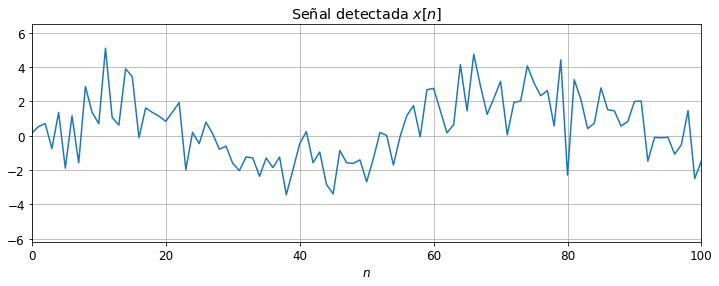

In [32]:
# Wiener filter - Denoising
N = 1000

# Señal dseada - Proceso Autoregresivo
alpha = 0.95
b = [np.sqrt(1-alpha**2)]
d = signal.lfilter(b,[1,-alpha],np.random.randn(N))

# Ruido blanco
sigv = np.sqrt(2)
v = sigv*np.random.randn(N)

x = d+v 

plt.figure(figsize=[12,4])
plt.plot(x)
plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal detectada $x[n]$')


Error medio cuadrático:  0.37635569248884676
Error medio cuadrático (ideal):  0.3711205331090546


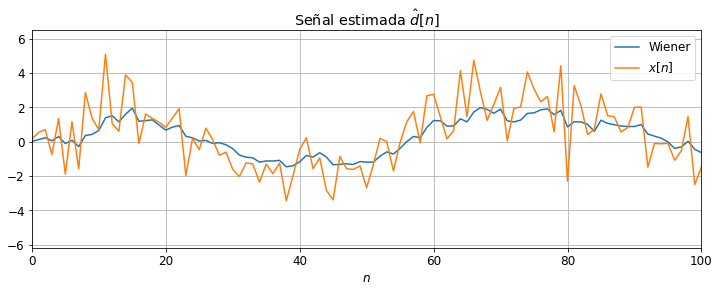

In [51]:
# Wiener Filter

P = 5

# Matriz Rx = Rd + Rv
Rd = np.zeros((P,P))
for i in range(P):
    for j in range(P):
        Rd[i,j] = alpha**np.abs(i-j)
Rv = sigv**2 * np.eye(P)
Rx = Rd + Rv

# Vector rdx = rd
rdx = alpha**np.arange(P)

# Calculando Filtro Wiener
W = np.dot(np.linalg.inv(Rx),rdx)
dW = signal.lfilter(W,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener','$x[n]$'])

# Calculando algunos parámetros
print('Error medio cuadrático: ',np.mean((d-dW)**2))
print('Error medio cuadrático (ideal): ',rdx[0] - np.dot(W,rdx))

Error medio cuadrático:  0.3788913753415413


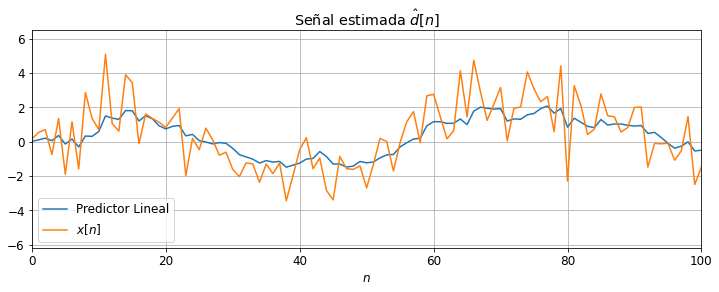

In [52]:
# Utilizando los datos para calcular las correlaciones (Predictivo)

# Matriz Rx = Rd + Rv
rx = np.zeros(P)
for i in range(P):
    rx[i] = np.mean(x[0:N-i]*x[i:N])
    
Rx = np.zeros((P,P))
for i in range(P):
    for j in range(P):
        Rx[i,j] = rx[np.abs(i-j)]

# Vector rdx = rd
rdx = np.zeros(P)
for i in range(P):
    rdx[i] = np.mean(x[0:N-(i+1)]*x[(i+1):N])

# Calculando Filtro Wiener
W1 = np.dot(np.linalg.inv(Rx),rdx)
dW1 = signal.lfilter(W1,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dW1)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Predictor Lineal','$x[n]$'])

print('Error medio cuadrático: ',np.mean((d-dW1)**2))


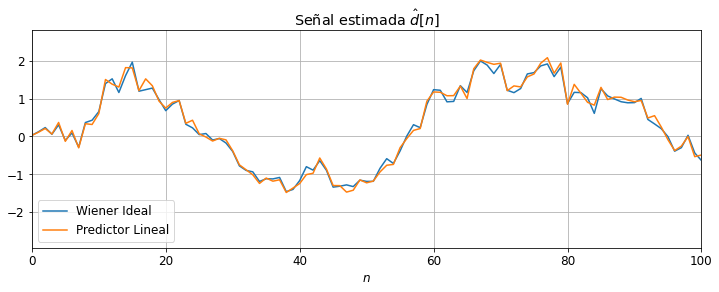

In [53]:
# Comparando Wiener ideal vs. Predicción Lineal usando datos

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(dW1)
#plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','Predictor Lineal'])


Error medio cuadrático:  0.6588232478404984


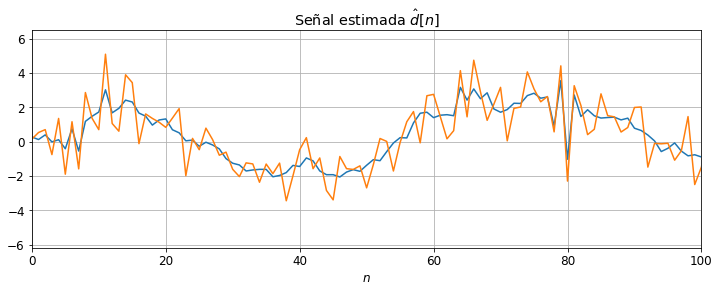

In [54]:
# Comparando con la función signal.wiener
dW2 = signal.wiener(x,mysize=P)

plt.figure(figsize=[12,4])
plt.plot(dW2)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')

print('Error medio cuadrático: ',np.mean((d-dW2)**2))


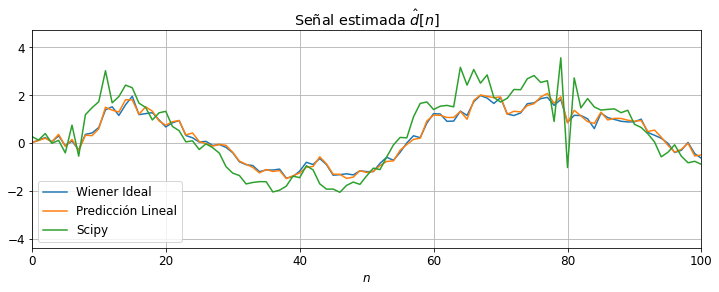

In [55]:
plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(dW1)
plt.plot(dW2)
#plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','Predicción Lineal','Scipy'])
